# Elementary Complex Analysis

---

```{admonition} Revised
07 May 2023
```
```{contents}
```

---

In [96]:
import numpy             as np
import matplotlib        as mpl
from   matplotlib        import cm
from   matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
plt.style.use('ggplot');
#mpl.projections.get_projection_names()
#plt.style.available

import scipy
from   scipy import integrate

import  math
import cmath

from IPython.display import display, Math

from   datetime import datetime as d
import locale                   as l
import platform                 as p
import sys                      as s

pad = 20
print(f"{'Executed'.upper():<{pad}}: {d.now()}")
print()
print(f"{'Platform'   :<{pad}}: "
      f"{p.mac_ver()[0]} | "
      f"{p.system()} | "
      f"{p.release()} | "
      f"{p.machine()}")
print(f"{''           :<{pad}}: {l.getpreferredencoding()}")
print()
print(f"{'Python'     :<{pad}}: {s.version}")
print(f"{''           :<{pad}}: {s.version_info}")
print(f"{''           :<{pad}}: {p.python_implementation()}")
print()
print(f"{'Matplotlib' :<{pad}}: {mpl.__version__}")
print(f"{'NumPy'      :<{pad}}: {np .__version__}")
print(f"{'SciPy'      :<{pad}}: {scipy.__version__}")

EXECUTED            : 2023-05-07 15:32:43.759892

Platform            : 13.3.1 | Darwin | 22.4.0 | arm64
                    : UTF-8

Python              : 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]
                    : sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)
                    : CPython

Matplotlib          : 3.6.3
NumPy               : 1.24.1
SciPy               : 1.10.0


In [119]:
def translate (z,z0=1+2j):
  return z0+z
def scale (z,r=0.5):
  return r*z
def rotate90 (z):
  "Multiply z by i to rotate by 90 degrees."
  return complex(-z.imag,z.real)
def rotate180 (z):
  "Multiply z by -1=i^2 to rotate by 180 degrees."
  return -z
def rotate270 (z):
  "Multiply z by -i=i^3 to rotate by 270 degrees."
  return complex(z.imag,-z.real)
def rotate (z,tau):
  "Rotate z by tau radians."
  return z*cmath.e**(tau*1j)
def uC (z):
  "Project a complex number onto the unit circle."
  return cmath.e**(1j*cmath.polar(z)[1])

def pC (S,xl=-10,yl=10,dpi=100,t='n',v='n'):
  "Plot a set of complex numbers in the complex plane."
  fig = plt.figure(dpi=dpi);
  ax = plt.subplot();
  ax.set_aspect(1);
  for s in S:
    for x,y in [np.array([[c.real,c.imag] for c in s]).T]:
      ax.scatter(x,y);
      if v=='y':
        ax.quiver([0]*len(x),[0]*len(y),x,y,scale_units='xy',scale=1,width=0.001);
  ax.add_patch(plt.Circle((0,0),1,facecolor='None',edgecolor='b'));
  ax.set_xticks(ticks=np.arange(xl,yl+1),labels=np.arange(xl,yl+1));
  ax.set_yticks(ticks=np.arange(xl,yl+1),labels=[f'{str(c)}i' for c in np.arange(xl,yl+1)]);
  ax.set_xlim(xl,yl);
  ax.set_ylim(xl,yl);
  ax.set_xlabel('Re');
  ax.set_ylabel('Im');

---

## What is $i$?

$
\boxed{
i\overset{\text{def}}=\sqrt{-1}
}
$

$
\begin{aligned}
i^0&=1\\
i^1&=\sqrt{-1}\\
i^2&=(\sqrt{-1})^2=-1\\
i^3&=ii^2=(i)(-1)=-i\\
i^4&=i^2i^2=(-1)(-1)=1=i^0\\
i^5&=ii^4=(i)(1)=i=i^1\\
i^6&=i^2i^4=(-1)(1)=-1=i^2\\
i^7&=ii^2i^4=(i)(-1)(1)=-i=i^3\\
i^8&=i^4i^4=(1)(1)=1=i^0\\
&...\\
i^{4n}&=1\\
i^{4n+1}&=i\\
i^{4n+2}&=-1\\
i^{4n+3}&=-i\\
\end{aligned}
$

where $n={0,1,2,3,...}$

In [3]:
def powers_of_i (ns):
  for n in range(ns):
    yield f"i^{n:>02} = {1j ** n}"

i = powers_of_i(25)
list(i)

['i^00 = (1+0j)',
 'i^01 = 1j',
 'i^02 = (-1+0j)',
 'i^03 = (-0-1j)',
 'i^04 = (1+0j)',
 'i^05 = 1j',
 'i^06 = (-1+0j)',
 'i^07 = (-0-1j)',
 'i^08 = (1+0j)',
 'i^09 = 1j',
 'i^10 = (-1+0j)',
 'i^11 = (-0-1j)',
 'i^12 = (1+0j)',
 'i^13 = 1j',
 'i^14 = (-1+0j)',
 'i^15 = (-0-1j)',
 'i^16 = (1+0j)',
 'i^17 = 1j',
 'i^18 = (-1+0j)',
 'i^19 = (-0-1j)',
 'i^20 = (1+0j)',
 'i^21 = 1j',
 'i^22 = (-1+0j)',
 'i^23 = (-0-1j)',
 'i^24 = (1+0j)']

---

## Complex Numbers

A complex number is an ordered pair $(a,b)$ where $a,b\in\mathbb{R}$.

A complex number may take the form

$z=a+bi$

In [4]:
z = 3 + 2j
z

(3+2j)

In [5]:
type(z)

complex

### The real part of a complex number

Let $z=a+bi$ where $a,b\in\mathbb{R}$ be a complex number.

The real part of $z$ is

$\text{Re}(z)=a=a+0i$ where $a,0\in\mathbb{R}$

In [6]:
z.real

3.0

### The imaginary part of a complex number

Let $z=a+bi$ where $a,b\in\mathbb{R}$ be a complex number.

The imaginary part of $z$ is

$\text{Im}(z)=bi=0+bi$ where $b,0\in\mathbb{R}$

In [7]:
z.imag * 1j

2j

$
z=\text{Re}(z)+\text{Im}(z)
$

### The set of complex numbers $\mathbb{C}$

The set of complex numbers

$
\begin{aligned}
\mathbb{C}=\{a+bi\mid a,b\in\mathbb{R}\}
\end{aligned}
$

---

x is imaginary

$
\begin{aligned}
x^2&=-1
\implies
x=i
\\
x^2&=-9
\implies
x=3i
\\
x^2&=-b
\implies
x=i\sqrt{b}
\end{aligned}
$

x is complex

$
\begin{aligned}
(x-1)^2&=-9
\implies
x-1=3i
\implies
x=3i+1
\end{aligned}
$

---

## Properties of complex numbers

### Additive Commutativity

$
\alpha+\beta=\beta+\alpha
\,\,\,\forall\alpha,\beta\in\mathbb{C}
$

PROOF

$\blacksquare$

In [14]:
a = (3 + 2j)
b = (5 + 4j)

print(a + b)
print(         b + a)
print(a + b == b + a)

(8+6j)
(8+6j)
True


### Multiplicative Commutativity

$
\alpha\beta=\beta\alpha
\,\,\,\forall\alpha,\beta\in\mathbb{C}
$

PROOF

Let $\alpha = a + bi$ and $\beta = c + di$ where $a, b, c, d \in \mathbb{R}$.<br>

$
\begin{aligned}
\alpha\beta &= (a + bi)(c + di) \\
&= ac + adi + bci + bdi^2 \\
&= (c + di)a + (c + di)bi \\
&= (c + di)(a + bi) \\
&= \beta\alpha \\
\end{aligned}
$

$\blacksquare$

In [13]:
a = (3 + 2j)
b = (5 + 4j)

print(a * b)
print(         b * a)
print(a * b == b * a)

(7+22j)
(7+22j)
True


### Additive Associativity

$
(\alpha+\beta)+\lambda=\alpha+(\beta+\lambda)
\,\,\,\forall\alpha,\beta,\lambda\in\mathbb{C}
$

PROOF

$\blacksquare$

In [17]:
a = (3 + 2j)
b = (5 + 4j)
l = (7 + 6j)

print( a + b                    )
print(                    b + l )
print((a + b) + l               )
print(               a + (b + l))
print((a + b) + l == a + (b + l))

(8+6j)
(12+10j)
(15+12j)
(15+12j)
True


### Multiplicative Associativity

$
(\alpha\beta)\lambda=\alpha(\beta\lambda)
\,\,\,\forall\alpha,\beta,\lambda\in\mathbb{C}
$

PROOF

$\blacksquare$

In [18]:
a = (3 + 2j)
b = (5 + 4j)
l = (7 + 6j)

print( a * b                    )
print(                    b * l )
print((a * b) * l               )
print(               a * (b * l))
print((a * b) * l == a * (b * l))

(7+22j)
(11+58j)
(-83+196j)
(-83+196j)
True


### Existence of the additive identity element

$
\lambda+0=\lambda
\,\,\,\forall\lambda\in\mathbb{C},0\in\mathbb{R}
$

PROOF

$\blacksquare$

In [20]:
l = 3 + 2j
i = 0 + 0j

print(l         )
print(     l + i)
print(l == l + i)

(3+2j)
(3+2j)
True


### Existence of the multiplicative identity element

$
\lambda1=\lambda
\,\,\,\forall\lambda\in\mathbb{C},1\in\mathbb{R}
$

PROOF

$\blacksquare$

In [24]:
l = 3 + 2j
i = 1 + 0j

print(l         )
print(     l * i)
print(l == l * i)

(3+2j)
(3+2j)
True


### Existence of additive inverse elements

$\forall \alpha \in \mathbb{C}$, $\exists \beta \in \mathbb{C}$ s.t. $\alpha + \beta = 0$<br>
The additive inverse of an element $\alpha$ is denoted $-\alpha$.<br>

PROOF

$\blacksquare$

### Existence of multiplicative inverse elements

$\forall \alpha \in \mathbb{C}$ with $\alpha \neq 0$, $\exists \beta \in \mathbb{C}$ s.t. $\alpha\beta = 1$<br>
The multiplicative inverse of an element $\alpha \neq 0$ is denoted $\alpha^{-1}$.<br>

PROOF

$\blacksquare$

### Distributivity

$\lambda(\alpha + \beta) = \lambda\alpha + \lambda\beta$<br>
$\forall \lambda, \alpha, \beta \in \mathbb{C}$<br>

PROOF

$\blacksquare$

---

## Operations on complex numbers

### Complex Addition

$
(a+bi)+(c+di)=(a+c)+(b+d)i\,\,\,\text{where}\,a,b,c,d\in\mathbb{R}
$

PROOF

$
\begin{aligned}
&(a+bi)+(c+di)\\
&=a+bi+c+di\\
&=a+c+bi+di\\
&=(a+c)+(bi+di)\\
&=(a+c)+(b+d)i\\
\end{aligned}
$

$\blacksquare$

In [43]:
a=1
b=2
c=3
d=4

display(
  complex(a,b) + complex(c,d),
  complex((a+c), (b+d)),
  complex(a,b) + complex(c,d) == complex((a+c), (b+d)),
)

(4+6j)

(4+6j)

True

### Complex Multiplication

$
(a+bi)(c+di)=(ac-bd)+(ad+bc)i\,\,\,\text{where}\,a,b,c,d\in\mathbb{R}
$

PROOF

$
\begin{aligned}
&(a+bi)(c+di)\\
&=ac+adi+bci+bdi^2\\
&=ac+bdi^2+adi+bci\\
&=ac-bd+adi+bci\\
&=(ac-bd)+(adi+bci)\\
&=(ac-bd)+(ad+bc)i\\
\end{aligned}
$

$\blacksquare$

In [39]:
a=1
b=2j
c=3
d=4j

display(
  (a+b) * (c+d),
  complex((a*c - b.imag*d.imag),(a*d.imag + b.imag*c)),
  (a+b) * (c+d) == complex((a*c - b.imag*d.imag),(a*d.imag + b.imag*c)),
)

(-5+10j)

(-5+10j)

True

### Complex Subtraction

$
\beta-\alpha\equiv\beta+(-\alpha)
$

In [45]:
a=1
b=2
c=3
d=4

display(
  complex(a,b) -  complex(c,d),
  complex(a,b) + -complex(c,d),
  complex(a,b) -  complex(c,d) == complex(a,b) + -complex(c,d),
)

(-2-2j)

(-2-2j)

True

### Complex Division

$
\begin{aligned}
\frac{\beta}{\alpha}\equiv\beta\alpha^{-1}
\end{aligned}
$

---

Complex arithmetic obeys the same predence rules as real arithmetic.

In [46]:
1+2j*3

(1+6j)

In [47]:
(1+2j)*3

(3+6j)

In [48]:
4*3j**2

(-36+0j)

In [49]:
(4*3j)**2

(-144+0j)

---

## Complex Conjugate of a complex number

<span style="color: blue">**DEFINITION**</span><br>
Let $z \in \mathbb{C}$.<br>
The complex conjugate of $z$ is $\bar{z} \overset{\text{def}}= \,(\text{Re}\, z) - \,(\text{Im}\, z) i$.<br>
If $z = a + bi$, then $\bar{z} = a - bi$.<br>

In [57]:
(1+2j).conjugate()

(1-2j)

## Absolute Value of a complex number

<span style="color: blue">**DEFINITION**</span><br>
Let $z \in \mathbb{C}$.<br>
The absolute value of $z$ is $|z| \overset{\text{def}}= \sqrt{\,(\text{Re}\, z)^2 + \,(\text{Im}\, z)^2}$.<br>
If $z = a + bi$, then $|z| = \sqrt{a^2 + b^2}$.<br>

__Claim__

$\forall z \in \mathbb{C}, |z| \ge 0$. (The absolute value of any complex number is nonnegative.)

__Proof__

This follows from the fact that the sum of squares of a collection of real numbers is nonnegative.

$\blacksquare$

__Claim__

If $z \in \mathbb{R}$, then $z = \bar{z}$. (The complex conjugate of a real number is itself.)

__Proof__

$z = a + 0i = a = a - 0i = \bar{z}$

$\blacksquare$<br>

In [56]:
abs(1+2j) == np.sqrt(1**2 + 2**2)

True

---

## Operations on a complex number and its conjugate

### Sum of $z$ and $\bar{z}$

Let $z \in \mathbb{C}$.<br>
$z + \bar{z} = 2a$<br>

__Proof__<br>

$
\begin{aligned}
z + \bar{z}
&= (a + bi) + (a - bi) \\
&= a + bi + a - bi \\
&= 2a + bi - bi \\
&= 2a
\end{aligned}
$

$\blacksquare$<br>

### Difference of $z$ and $\bar{z}$

Let $z \in \mathbb{C}$.<br>
$z - \bar{z} = 2bi$<br>

__Proof__<br>

$
\begin{aligned}
z - \bar{z}
&= (a + bi) - (a - bi) \\
&= a + bi - a + bi \\
&= 2bi + a - a \\
&= 2bi
\end{aligned}
$<br>

$\blacksquare$<br>

### Product of $z$ and $\bar{z}$

Let $z \in \mathbb{C}$.<br>
$z \bar{z} = |z|^2$<br>

__Proof__<br>

$
\begin{aligned}
z \bar{z}
&= (a + bi) (a - bi) \\
&= a^2 - abi + abi - (bi)^2 \\
&= a^2 - b^2 i^2 \\
&= a^2 + b^2 \\
&= (\sqrt{a^2 + b^2})^2 \\
&= |z|^2
\end{aligned}
$<br>

$\blacksquare$<br>

---

## Properties of the complex conjugate and the absolute value of a complex number

### Additivity of the complex conjugate

Let $w, z \in \mathbb{C}$.<br>
$\overline{w + z} = \bar{w} + \bar{z}$<br>

__Proof__<br>

$
\begin{aligned}
w + z
&= (a + bi) + (c + di) \\
&= (a + c) + (b + d)i \\
\overline{w + z}
&= (a + c) - (b + d)i \\
&= a + c - bi - di \\
&= (a - bi) + (c - di) \\
&= \bar{w} + \bar{z} \\
\end{aligned}
$<br>

$\blacksquare$<br>

### Multiplicativity of the complex conjugate

Let $w, z \in \mathbb{C}$.<br>
$\overline{w z} = \bar{w} \bar{z}$<br>

__Proof__<br>

$
\begin{aligned}
w z
&= (a + bi) (c + di) \\
&= ac + adi + bci + bdi^2 \\
&= (ac - bd) + (ad + bc)i \\
\overline{w z}
&= (ac - bd) - (ad + bc)i \\
&= ac - bd - adi - bci \\
&= ac - adi - bci + bdi^2 \\
&= (a - bi) (c - di) \\
&= \bar{w} \bar{z} \\
\end{aligned}
$<br>

$\blacksquare$<br>

### Conjugate of the conjugate

Let $z \in \mathbb{C}$.<br>
$\bar{\bar{z}} = z$<br>

__Proof__<br>

$
\begin{aligned}
\bar{z}
&= a - bi \\
&= (a) + (-b)i \\
\bar{\bar{z}}
&= (a) - (-b)i \\
&= a + bi \\
&= z \\
\end{aligned}
$<br>

$\blacksquare$<br>

### Boundedness

Let $z \in \mathbb{C}$.<br>
$|a| \le |z|$ and $|b| \le |z|$<br>

__Proof__<br>

$
\begin{aligned}
|a|
&= \sqrt{a^2} \\
&\le \sqrt{a^2 + b^2} \\
&= |z|
\end{aligned}
$<br>

$\blacksquare$<br>

### Absolute value of the complex conjugate

Let $z \in \mathbb{C}$.<br>
$|\bar{z}| = |z|$<br>

__Proof__<br>

$
\begin{aligned}
\bar{z}
&= a - bi \\
&= (a) + (-b)i \\
|\bar{z}|
&= \sqrt{(a)^2 + (-b)^2} \\
&= \sqrt{a^2 + b^2} \\
&= |z| \\
\end{aligned}
$<br>

$\blacksquare$<br>

### Multiplicativity of the absolute value

Let $w, z \in \mathbb{C}$.<br>
$|w||z| = |wz|$<br>

__Proof__<br>

$
\begin{aligned}
wz
&= (a + bi) (c + di) \\
&= ac + adi + bci + bdi^2 \\
&= (ac - bd) + (ad + bc)i \\
|wz|
&= \sqrt{(ac - bd)^2 + (ad + bc)^2} \\
&= \sqrt{(ac)^2 - 2abcd + (bd)^2 + (ad)^2 + 2abcd + (bc)^2} \\
&= \sqrt{(ac)^2 + (bd)^2 + (ad)^2 + (bc)^2} \\
&= \sqrt{(ac)^2 + (ad)^2 + (bd)^2 + (bc)^2} \\
&= \sqrt{a^2(c^2 + d^2) + b^2(c^2 + d^2)} \\
&= \sqrt{(a^2 + b^2)(c^2 + d^2)} \\
&= \sqrt{a^2 + b^2} \sqrt{c^2 + d^2} \\
&= |w||z| \\
\end{aligned}
$<br>

$\blacksquare$<br>

### Triangle Inequality

Let $w, z \in \mathbb{C}$.<br>
$|w + z| \le |w| + |z|$<br>

__Proof__<br>

$
\begin{aligned}
|w + z|^2
&= (w + z)(\bar{w} + \bar{z}) \\
&= w \bar{w} + z \bar{z} + w \bar{z} + z \bar{w} \\
&= |w|^2 + |z|^2 + w \bar{z} + \overline{w \bar{z}} \\
&= |w|^2 + |z|^2 + w \bar{z} + 2 \,\text{Re}\, (w \bar{z}) \\
&\le |w|^2 + |z|^2 + w \bar{z} + 2 |w \bar{z}| \\
&= |w|^2 + |z|^2 + w \bar{z} + 2 |w| |z| \\
&= (|w| + |z|)^2 \\
|w + z|
&\le |w| + |z| \\
\end{aligned}
$<br>

$\blacksquare$<br>

---

## Euler's Formula

$
\boxed{
\begin{aligned}
e^{i\theta}
&=\cos\theta+i\sin\theta
\\
e^{i\pi}+1
&=0
\end{aligned}
}
$

$
\begin{aligned}
e^x
&=1+x+\frac{x^2}{2!}+\frac{x^3}{3!}+\frac{x^4}{4!}+\frac{x^5}{5!}+\frac{x^6}{6!}+\frac{x^7}{7!}+\frac{x^8}{8!}+\frac{x^9}{9!}+...
&&\text{Taylor series}
\\
x&=i\theta
\\
e^{i\theta}&=1+(i\theta)+\frac{(i\theta)^2}{2!}+\frac{(i\theta)^3}{3!}+\frac{(i\theta)^4}{4!}+\frac{(i\theta)^5}{5!}+\frac{(i\theta)^6}{6!}+\frac{(i\theta)^7}{7!}+\frac{(i\theta)^8}{8!}+\frac{(i\theta)^9}{9!}+...
\\
&=1+i\theta+\frac{(-1)\theta^2}{2!}+\frac{(-i)\theta^3}{3!}+\frac{(1)\theta^4}{4!}+\frac{(i)\theta^5}{5!}+\frac{(-1)\theta^6}{6!}+\frac{(-i)\theta^7}{7!}+\frac{(1)\theta^8}{8!}+\frac{(i)\theta^9}{9!}+...
\\
&=1+i\theta-\frac{\theta^2}{2!}-\frac{i\theta^3}{3!}+\frac{\theta^4}{4!}+\frac{i\theta^5}{5!}-\frac{\theta^6}{6!}-\frac{i\theta^7}{7!}+\frac{\theta^8}{8!}+\frac{i\theta^9}{9!}-...
\\
&=\left(1-\frac{\theta^2}{2!}+\frac{\theta^4}{4!}-\frac{\theta^6}{6!}+\frac{\theta^8}{8!}-...\right)
+\left(i\theta-\frac{i\theta^3}{3!}+\frac{i\theta^5}{5!}-\frac{i\theta^7}{7!}+\frac{i\theta^9}{9!}-...\right)
\\
&=\left(1-\frac{\theta^2}{2!}+\frac{\theta^4}{4!}-\frac{\theta^6}{6!}+\frac{\theta^8}{8!}-...\right)
+i\left(\theta-\frac{\theta^3}{3!}+\frac{\theta^5}{5!}-\frac{\theta^7}{7!}+\frac{\theta^9}{9!}-...\right)
\\
&=\cos\theta+i\sin\theta
\\
\theta&=\pi
\\
e^{i\pi}
&=\cos\pi+i\sin\pi
\\
&=-1+0
\end{aligned}
$

### $i^i$

$
\boxed{
i^i=\,\,e^{-\frac{\pi}{2}}
}
$

$
\begin{aligned}
e^{i\pi}
&=-1
\\
\sqrt{e^{i\pi}}
&=\sqrt{-1}
\\
e^{i\frac{\pi}{2}}
&=i
\\
(e^{i\frac{\pi}{2}})^i
&=i^i
\\
e^{i^2\frac{\pi}{2}}&=
\\
e^{-\frac{\pi}{2}}&=
\end{aligned}
$

---

## The Unit Circle in the Complex Plane

Complex exponentials form circles!

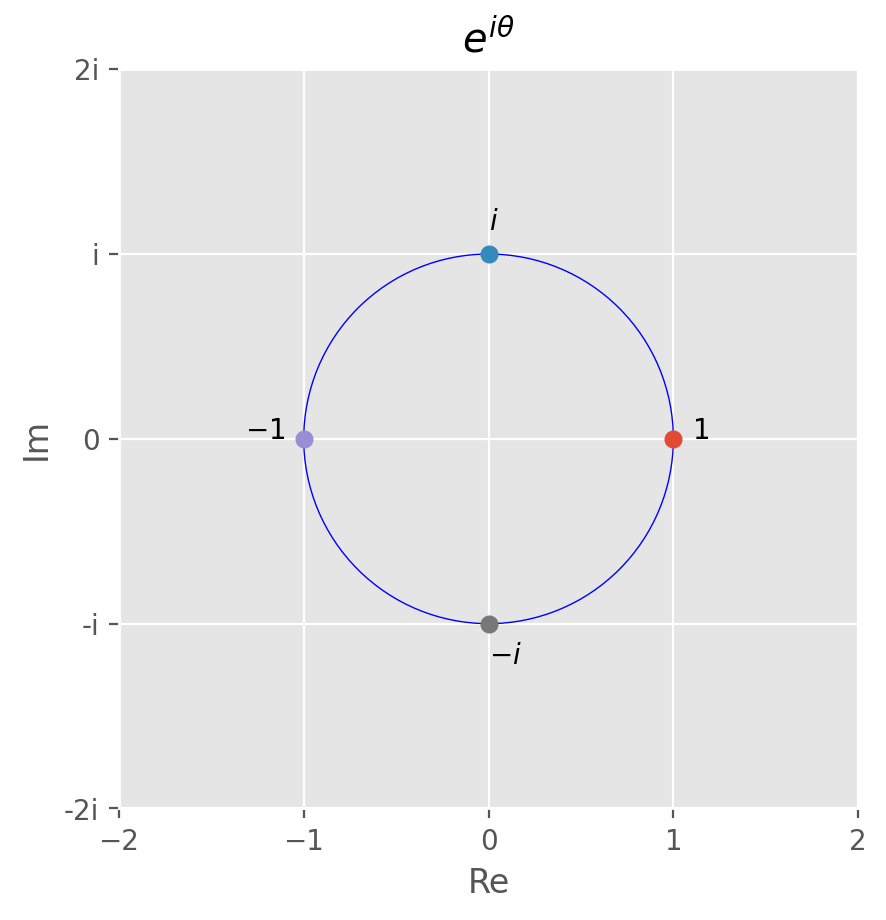

In [92]:
fig = plt.figure(dpi=200);
ax  = plt.subplot(111,projection='rectilinear');
ax.set_aspect(1);

ax.add_patch(plt.Circle((0,0),1,edgecolor='b',facecolor='None'));
ax.scatter( 1, 0); ax.text( 1*1.1, 0, '$1$', horizontalalignment='left');
ax.scatter( 0, 1); ax.text( 0, 1*1.1, '$i$', verticalalignment='bottom');
ax.scatter(-1, 0); ax.text(-1*1.1, 0, '$-1$', horizontalalignment='right');
ax.scatter( 0,-1); ax.text( 0,-1*1.1, '$-i$', verticalalignment='top');

ax.set_xlabel('Re');
ax.set_xticks(ticks=np.arange(-2,3,1));
ax.set_xlim(-2,2);
ax.set_ylabel('Im');
ax.set_yticks(ticks=np.arange(-2,3,1),labels=['-2i','-i','0','i','2i']);
ax.set_ylim(-2,2);
ax.set_title('$e^{i\\theta}$');

$
\begin{aligned}
w^0,w^1,...,w^{n-1}
\,\,\,\text{where}\,\,\,
w=e^{\frac{2\pi}{n}i}
\,\,\,\text{and}\,\,\,
n=N
\end{aligned}
$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

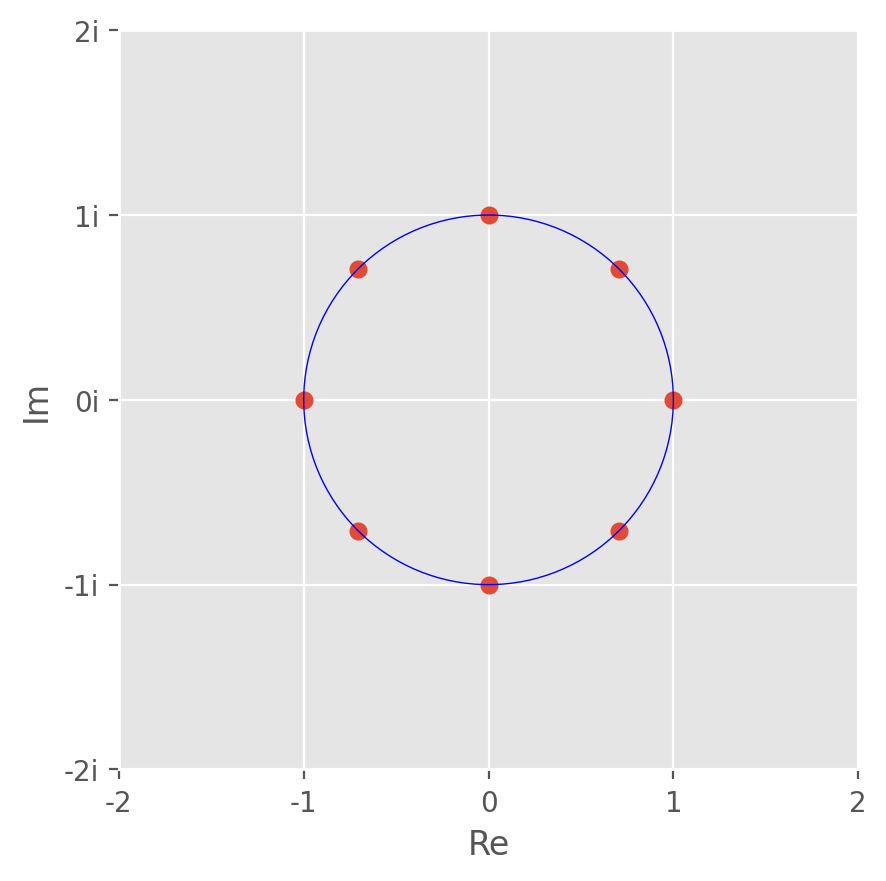

In [120]:
N=8
unitCircle = {math.e ** (2*math.pi * 1j * n/N) for n in range(N)}

for i,c in enumerate(unitCircle):
  display(Math(
    fr'w^{i} = {c.real} + {c.imag}i'
  ))

pC([
  unitCircle,
],-2,2,dpi=200)

---

## Polar Representation of Complex Numbers

$
\boxed{
\begin{aligned}
z=re^{\theta i}
\,\,\,\text{where}\,\,\,
r=|z|
\end{aligned}
}
$

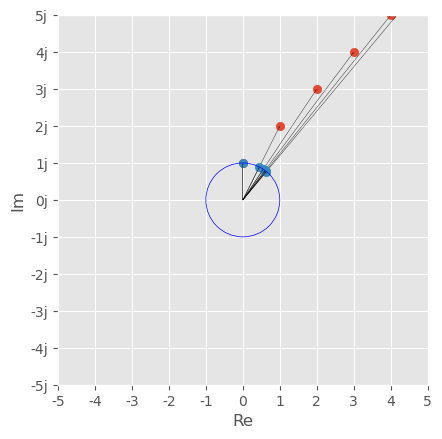

In [101]:
zs={
  0+1j,
  1+2j,
  2+3j,
  3+4j,
  4+5j,
  5+6j,
}

pC([
  zs,
  {uC(z) for z in zs},
],-5,5,v='y')

---

## Transformations via Complex Operations

### Rotation

To rotate a complex number $z$ where $\text{arg}\,\,\,z=\theta$ by $\tau$ radians

$
\begin{aligned}
re^{(\theta+\tau)i}=re^{\theta i}re^{\tau i}=ze^{\tau i}
\end{aligned}
$

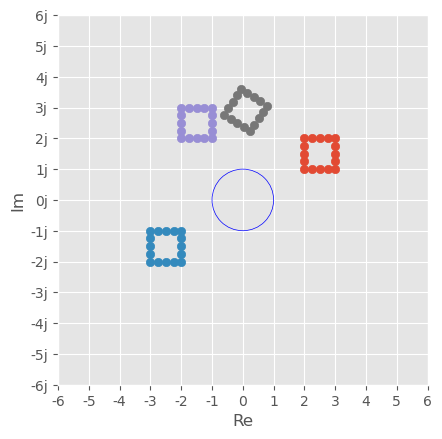

In [102]:
S={
  2   +1.25j,
  2   +1.50j,
  2   +1.75j,
  2   +2j,
  2.25+2j,
  2.50+2j,
  2.75+2j,
  3   +2j,
  2   +1j,
  2.25+1j,
  2.5 +1j,
  2.75+1j,
  3   +1j,
  3   +1.25j,
  3   +1.50j,
  3   +1.75j,
}

pC([
  S,
  {rotate(c,np.pi) for c in S},
  {rotate(c,np.pi/2) for c in S},
  {rotate(c,1) for c in S},
],-6,6,v='n')

---

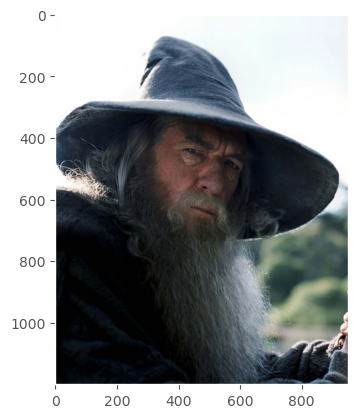

In [115]:
imgRGB = mpimg.imread(fname='gandalf.png')
fig = plt.figure();
ax  = plt.subplot();
ax.imshow(X=imgRGB);
ax.grid(False);
#ax.axis('off');

In [117]:
#img=np.flip(np.dot(imgRGB,[0.2989,0.5870,0.1140]),0)
img=np.dot(imgRGB,[0.2989,0.5870,0.1140])
img.shape

(1200, 952)

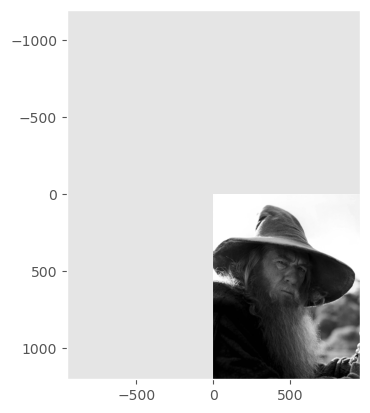

In [118]:
fig = plt.figure();
ax  = plt.subplot();
ax.imshow(X=img,cmap=mpl.pyplot.get_cmap(name='gray'),vmin=0,vmax=1);
ax.grid(False);
#ax.axis('off');
ax.set_xlim(-952,952);
ax.set_ylim(1200,-1200);

---

## Resources

[[Y](https://www.youtube.com/watch?v=cy8r7WSuT1I)] Sanderson, Grant (3Blue1Brown). (02 Apr 2023). "Why π is in the normal distribution (beyond integral tricks)". YouTube.

* Zaczyński, Bartosz. "Simplify Complex Numbers with Python". Real Python. [Page](https://realpython.com/python-complex-numbers/).

---

## Terms

* [[W](https://en.wikipedia.org/wiki/Complex_analysis)] Complex Analysis
* [[W](https://en.wikipedia.org/wiki/Complex_logarithm)] Complex Logarithm
* [[W](https://en.wikipedia.org/wiki/Complex_number)] Complex Number
* [[W](https://en.wikipedia.org/wiki/Complex_plane)] Complex Plane
* [[W](https://en.wikipedia.org/wiki/Euler%27s_formula)] Euler's Formula
* [[W](https://en.wikipedia.org/wiki/Imaginary_unit)] Imaginary Unit
* [[W](https://en.wikipedia.org/wiki/Lacunary_value)] Lacunary Value
* [[W](https://en.wikipedia.org/wiki/Phasor)] Phasor
* [[W](https://en.wikipedia.org/wiki/Root_of_unity)] Roots of Unity

---

In [ ]:
def solve1 (a,b,c):
  "solves ax + b = c"
  return (c-b)/a

display(
  solve1(10,5,30),
  solve1(10+5j,5,20),
)

2.5

(1.2-0.6j)